# Utilisation d'une photoresistance

In [ ]:
# imports
from math import log
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

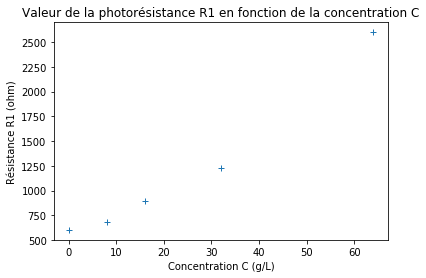

In [2]:
#13°) R1 = f(C)
R = [602, 681, 890, 1228, 2600]
C = [0., 8., 16., 32., 64.]
plt.plot(C,R,"+")
plt.title("Valeur de la photorésistance R1 en fonction de la concentration C")
plt.xlabel("Concentration C (g/L)")
plt.ylabel("Résistance R1 (ohm)")
plt.show()

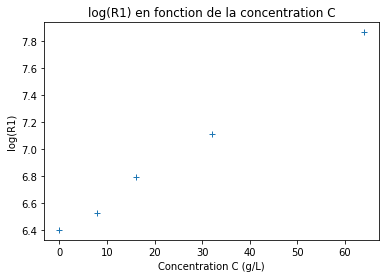

In [3]:
#14°) log(R1) = f(C)
R = [602, 681, 890, 1228, 2600]
C = [0., 8., 16., 32., 64.]

logR = []
for val in R:
    logR.append(log(val))
    
plt.plot(C,logR,"+")
plt.title("log(R1) en fonction de la concentration C")
plt.xlabel("Concentration C (g/L)")
plt.ylabel("log(R1)")
plt.show()

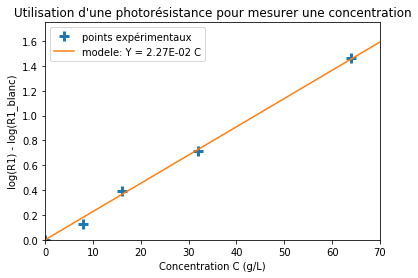

In [4]:
##15°) log(R1) - log(R1blanc) = f(C)

#R = R_0 * L**-k d'où log(R) = log(R_0) - k*log(L)
#De plus A = k_2 * C = log(L_0) - log(L) 
#on a donc k_2 * C = -1/k *(log(R_blanc) - log(R_0)) + 1/k (log(R_mes) - log(R_0))
#d'où log(R_mes) - log(R_blanc) = k * k_2 * C
#=> Il est inutile de calibrer la photorésistance car on ne veut pas l'absorbance absolue ou une valeur en lux.
#=> On peut se contenter d'une loi affine si on ne retire pas le blanc


#Construction de la liste calculée à partir des valeurs expérimentales
logRmoinslogR0 = [log(val)-log(R[0]) for val in R]

#Tracé des points expérimentaux avec quelques paramètres facultatifs
plt.plot(C,logRmoinslogR0,"+",markersize=10.,markeredgewidth=3.,label="points expérimentaux")

#Calcul du modèle
def lineaire(x,a):
    return a*x    
params,covariance = curve_fit(lineaire,C,logRmoinslogR0)

#Construction de la liste de valeurs pour le modèle
modele=[]
x = C+[70.]
for i in x:
    modele.append(lineaire(i,*params))
    
#Tracé du modèle (avec l'équation)
plt.plot(x,modele,label="modele: Y = {:.2E} C".format(*params))

plt.xlim([0.,70.])
plt.ylim([0.,1.75])
plt.xlabel("Concentration C (g/L)")
plt.ylabel("log(R1) - log(R1_blanc)")
plt.title("Utilisation d'une photorésistance pour mesurer une concentration")
plt.legend()
plt.show()

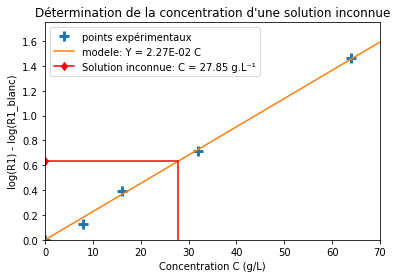

In [5]:
##16°) Mesure de la solution X
Rx = 1134
logRx = log(Rx)-log(R[0])

#Construction de la liste calculée à partir des valeurs expérimentales
logRmoinslogR0 = [log(val)-log(R[0]) for val in R]

#Tracé des points expérimentaux
plt.plot(C,logRmoinslogR0,"+",markersize=10.,markeredgewidth=3.,label="points expérimentaux")

#Calcul du modèle
def lineaire(x,a):
    return a*x
params,covariance = curve_fit(lineaire,C,logRmoinslogR0)

#Construction de la liste de valeurs pour le modèle
modele=[]
x = C+[70.]
for i in x:
    modele.append(lineaire(i,*params))

#Tracé du modèle 
plt.plot(x,modele,label="modele: Y = {:.2E} C".format(*params))

#Facultatif, permet de visualiser la mesure (en rouge) et d'afficher la valeur
plt.plot([0],[logRx],marker="d",color="red",label="Solution inconnue: C = {:.2f} g.L\u207B\u00B9".format(logRx/params[0]))
plt.plot([0,logRx/params[0],logRx/params[0]],[logRx,logRx,0],color="red")

plt.xlim([0.,70.])
plt.ylim([0.,1.75])
plt.xlabel("Concentration C (g/L)")
plt.ylabel("log(R1) - log(R1_blanc)")
plt.title("Détermination de la concentration d'une solution inconnue")

plt.legend()
plt.show()


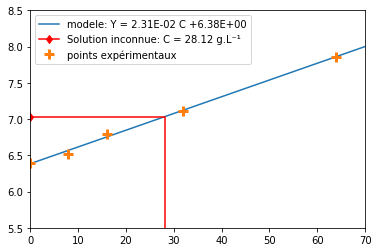

In [6]:
##En utilisant une loi Affine
logR = [log(i) for i in R]

def affine(x,a,b):
    return a * x + b
    
params,covariance = curve_fit(affine,C,logR)

modele=[]
x = C+[70.]
for i in x:
    modele.append(affine(i,*params))
plt.plot(x,modele,label="modele: Y = {:.2E} C {:+.2E}".format(*params))

Rx = 1134
logRx = log(Rx)

plt.plot([0],[logRx],marker="d",color="red",label="Solution inconnue: C = {:.2f} g.L\u207B\u00B9".format((logRx-params[1])/params[0]))
plt.plot([0,(logRx-params[1])/params[0],(logRx-params[1])/params[0]],[logRx,logRx,0],color="red")

plt.plot(C,logR,"+",markersize=10.,markeredgewidth=3.,label="points expérimentaux")
plt.xlim([0.,70.])
plt.ylim([5.5,8.5])

plt.legend()
plt.show()